<a href="https://colab.research.google.com/github/ManasVardhan/ANN_notebooks/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np


In [23]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [24]:
import matplotlib.pyplot as plt

In [25]:
'''
CNN layer = Conv2D(num_feature_maps,(shape of filter),
num of strides,activation='relu',padding='same')
'''

print('x_train shape : ', x_train.shape,'\n', 'y_train.shape : ',y_train.shape)

x_train shape :  (60000, 28, 28) 
 y_train.shape :  (60000,)


##we need to reshape the data as image should be of the form 
## height * width * color_channels
## but our data is just height * width


In [26]:
#conversion of 2D Data to 3D data as CNN accepts 3D data

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [27]:
#finding out the number of unique values in train dataset
K = len(set(y_train)) 
print('Number of Classes : ', K)

Number of Classes :  10


In [33]:
model= tf.keras.Sequential([tf.keras.layers.Input(shape=x_train[0].shape),
                            tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu'),
                            tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu'),
                            tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(K,activation='softmax')
                          ])


In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3479 - accuracy: 0.8691 - val_loss: 0.3865 - val_accuracy: 0.8611
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3257 - accuracy: 0.8766 - val_loss: 0.3794 - val_accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3048 - accuracy: 0.8855 - val_loss: 0.3935 - val_accuracy: 0.8627
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2882 - accuracy: 0.8918 - val_loss: 0.3864 - val_accuracy: 0.8602
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2734 - accuracy: 0.8967 - val_loss: 0.3925 - val_accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2627 - accuracy: 0.9013 - val_loss: 0.3923 - val_accuracy: 0.8674
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2578 - accuracy: 0.9035 - val_loss: 0.3954 - val_ac

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 89,994
Trainable params: 89,994
Non-trainable params: 0
____________________________________________________

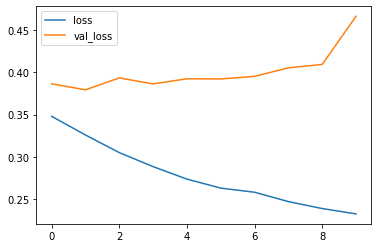

In [48]:
#Plotting results
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

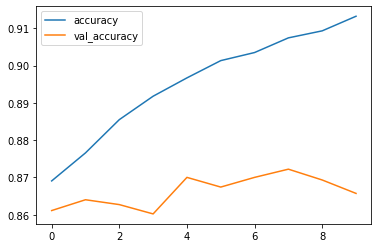

In [49]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

(60000, 28, 28, 1)